In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% pip install jugaad-data

In [98]:
from jugaad_data.nse import  index_df
from datetime import date,timedelta

df = index_df(symbol="NIFTY 50", from_date=date(2016,1,1),to_date=date(2021,6,30))
df=df[::-1]
print(df.to_markdown())






|      | Index Name   | INDEX_NAME   | HistoricalDate      |     OPEN |     HIGH |      LOW |    CLOSE |
|-----:|:-------------|:-------------|:--------------------|---------:|---------:|---------:|---------:|
| 1397 | Nifty 50     | Nifty 50     | 2016-01-01 00:00:00 |  7938.45 |  7972.55 |  7909.8  |  7963.2  |
| 1396 | Nifty 50     | Nifty 50     | 2016-01-04 00:00:00 |  7924.55 |  7937.55 |  7781.1  |  7791.3  |
| 1395 | Nifty 50     | Nifty 50     | 2016-01-05 00:00:00 |  7828.4  |  7831.2  |  7763.25 |  7784.65 |
| 1394 | Nifty 50     | Nifty 50     | 2016-01-06 00:00:00 |  7788.05 |  7800.95 |  7721.2  |  7741    |
| 1393 | Nifty 50     | Nifty 50     | 2016-01-07 00:00:00 |  7673.35 |  7674.95 |  7556.6  |  7568.3  |
| 1392 | Nifty 50     | Nifty 50     | 2016-01-08 00:00:00 |  7611.65 |  7634.1  |  7581.05 |  7601.35 |
| 1391 | Nifty 50     | Nifty 50     | 2016-01-11 00:00:00 |  7527.45 |  7605.1  |  7494.35 |  7563.85 |
| 1390 | Nifty 50     | Nifty 50     | 2016-01-12 00:00

In [99]:
df.describe()

,OPEN,HIGH,LOW,CLOSE
count,1398.000000,1398.000000,1398.000000,1398.000000
mean,10756.039092,10807.928433,10682.625966,10746.466059
std,2038.909583,2046.608067,2024.399291,2037.346521
min,7023.650000,7034.200000,6825.800000,6970.600000
25%,9221.375000,9269.437500,9148.725000,9200.150000
50%,10700.075000,10749.525000,10620.400000,10682.450000
75%,11678.100000,11743.325000,11614.500000,11671.662500
max,15915.350000,15915.650000,15842.400000,15869.250000


In [100]:
df.isnull().any()

Index Name        False
INDEX_NAME        False
HistoricalDate    False
OPEN              False
HIGH              False
LOW               False
CLOSE             False
dtype: bool

In [101]:
training_set=df.iloc[:,6:7].values

In [102]:
training_set

array([[ 7963.2 ],
       [ 7791.3 ],
       [ 7784.65],
       ...,
       [15814.7 ],
       [15748.45],
       [15721.5 ]])

In [103]:
#plt.figure(figsize=(16,8))
#plt.title("Close Price History")
#plt.plot(df["CLOSE"])
#plt.xlabel("Date",fontsize=18)
#plt.ylabel("Close price in Rupees (₹)",fontsize = 18)
#plt.show()

In [104]:
training_set

array([[ 7963.2 ],
       [ 7791.3 ],
       [ 7784.65],
       ...,
       [15814.7 ],
       [15748.45],
       [15721.5 ]])

In [105]:
##Scaling

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
scaled_training_set=sc.fit_transform(training_set)

In [106]:
scaled_training_set.shape

(1398, 1)

In [107]:
##Creating Data Structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60,(scaled_training_set.shape[0])-1):
    X_train.append(scaled_training_set[i-60:i,0:training_set.shape[1]])
    y_train.append(scaled_training_set[i,0])


    
##Converting into arrays
X_train, y_train = np.array(X_train),np.array(y_train)



In [108]:
##Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [109]:
X_train.shape

(1337, 60, 1)

In [110]:
y_train= y_train.reshape(-1,1)

In [111]:
y_train.shape

(1337, 1)

In [112]:
##Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [113]:
##Intialising the RNN
regressor = Sequential()

In [114]:
##Adding the first LSTM layer and some Dropout Regularisation
regressor.add(LSTM(units = 50,return_sequences= True, input_shape =  (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [115]:
##Adding the second LSTM layer and some Dropout Regularisation
regressor.add(LSTM(units = 50,return_sequences= True))
regressor.add(Dropout(0.2))

In [116]:
##Adding the third LSTM layer and some Dropout Regularisation
regressor.add(LSTM(units = 50,return_sequences= True))
regressor.add(Dropout(0.2))

In [117]:
##Adding the fourth LSTM layer and some Dropout Regularisation
regressor.add(LSTM(units = 50,return_sequences= False))
regressor.add(Dropout(0.2))

In [118]:
##Adding the output layer
regressor.add(Dense(units = 1))

In [119]:
##Compling the RNN
regressor.compile(optimizer = "adam",loss="mean_squared_error")

In [120]:
##Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
42/42 [==============================] - 12s 108ms/step - loss: 0.0745
Epoch 2/100
42/42 [==============================] - 5s 107ms/step - loss: 0.0057
Epoch 3/100
42/42 [==============================] - 4s 106ms/step - loss: 0.0045
Epoch 4/100
42/42 [==============================] - 4s 107ms/step - loss: 0.0051
Epoch 5/100
42/42 [==============================] - 4s 106ms/step - loss: 0.0047
Epoch 6/100
42/42 [==============================] - 4s 105ms/step - loss: 0.0039
Epoch 7/100
42/42 [==============================] - 4s 106ms/step - loss: 0.0042
Epoch 8/100
42/42 [==============================] - 4s 106ms/step - loss: 0.0039
Epoch 9/100
42/42 [==============================] - 4s 107ms/step - loss: 0.0042
Epoch 10/100
42/42 [==============================] - 5s 108ms/step - loss: 0.0040
Epoch 11/100
42/42 [==============================] - 5s 108ms/step - loss: 0.0038
Epoch 12/100
42/42 [==============================] - 5s 108ms/step - loss: 0.0034
Epoch 13/100

In [121]:
regressor.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)               

In [122]:
##Getting the real stock prices for the month of July
df_test = index_df(symbol="NIFTY 50", from_date=date(2021,7,1),to_date=date.today())
df_test = df_test.iloc[::-1]
print(df_test.to_markdown())

|    | Index Name   | INDEX_NAME   | HistoricalDate      |    OPEN |    HIGH |     LOW |   CLOSE |
|---:|:-------------|:-------------|:--------------------|--------:|--------:|--------:|--------:|
| 30 | Nifty 50     | NIFTY 50     | 2021-07-01 00:00:00 | 15755   | 15755.5 | 15667   | 15680   |
| 29 | Nifty 50     | NIFTY 50     | 2021-07-02 00:00:00 | 15705.9 | 15738.4 | 15636   | 15722.2 |
| 28 | Nifty 50     | NIFTY 50     | 2021-07-05 00:00:00 | 15793.4 | 15846   | 15762   | 15834.4 |
| 27 | Nifty 50     | NIFTY 50     | 2021-07-06 00:00:00 | 15813.8 | 15914.2 | 15801   | 15818.2 |
| 26 | Nifty 50     | NIFTY 50     | 2021-07-07 00:00:00 | 15819.6 | 15893.5 | 15779.7 | 15879.6 |
| 25 | Nifty 50     | NIFTY 50     | 2021-07-08 00:00:00 | 15855.4 | 15885.8 | 15682.9 | 15727.9 |
| 24 | Nifty 50     | NIFTY 50     | 2021-07-09 00:00:00 | 15688.2 | 15730.9 | 15632.8 | 15689.8 |
| 23 | Nifty 50     | NIFTY 50     | 2021-07-12 00:00:00 | 15766.8 | 15789.2 | 15644.8 | 15692.6 |
| 22 | Nif

In [123]:
data_dates=pd.to_datetime(df_test["HistoricalDate"])
#data_dates = df_test.iloc[:,2:3].values


In [124]:
data_dates

30   2021-07-01
29   2021-07-02
28   2021-07-05
27   2021-07-06
26   2021-07-07
25   2021-07-08
24   2021-07-09
23   2021-07-12
22   2021-07-13
21   2021-07-14
20   2021-07-15
19   2021-07-16
18   2021-07-19
17   2021-07-20
16   2021-07-22
15   2021-07-23
14   2021-07-26
13   2021-07-27
12   2021-07-28
11   2021-07-29
10   2021-07-30
9    2021-08-02
8    2021-08-03
7    2021-08-04
6    2021-08-05
5    2021-08-06
4    2021-08-09
3    2021-08-10
2    2021-08-11
1    2021-08-12
0    2021-08-13
Name: HistoricalDate, dtype: datetime64[ns]

In [125]:
#data_dates_=type(data_dates.to_numpy())
#data_dates = df["Historical"]

In [126]:
real_stock_prices = df_test.iloc[:,6:7].values

In [127]:
real_stock_prices.shape

(31, 1)

In [128]:
##Getting the real stocks till the month of July
df_total = pd.concat((df["CLOSE"],df_test["CLOSE"]),axis = 0)

In [129]:
df_total.shape

(1429,)

In [130]:
## Getting the predictions for the following days 
inputs = df_total[len(df_total)-len(df_test)-60:].values
inputs = inputs.reshape(-1,1)

In [131]:
inputs.shape

(91, 1)

In [132]:
inputs = sc.transform(inputs)

In [133]:
##Creating Data Structure with 60 timesteps and 1 output
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])

##Converting into arrays
X_test= np.array(X_test)



In [134]:
X_test.shape

(31, 60)

In [135]:
##Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [136]:
X_test.shape

(31, 60, 1)

In [137]:
predicted_stock_prices = regressor.predict(X_test)
predicted_stock_prices = sc.inverse_transform(predicted_stock_prices)

In [138]:
predicted_stock_prices

array([[15826.036],
       [15790.925],
       [15781.776],
       [15820.054],
       [15859.552],
       [15896.535],
       [15876.429],
       [15826.319],
       [15787.177],
       [15805.294],
       [15854.848],
       [15914.184],
       [15951.998],
       [15918.162],
       [15831.958],
       [15813.803],
       [15851.04 ],
       [15886.465],
       [15880.235],
       [15844.949],
       [15831.298],
       [15832.08 ],
       [15870.992],
       [15978.148],
       [16107.317],
       [16202.494],
       [16231.424],
       [16231.349],
       [16235.902],
       [16251.182],
       [16293.28 ]], dtype=float32)

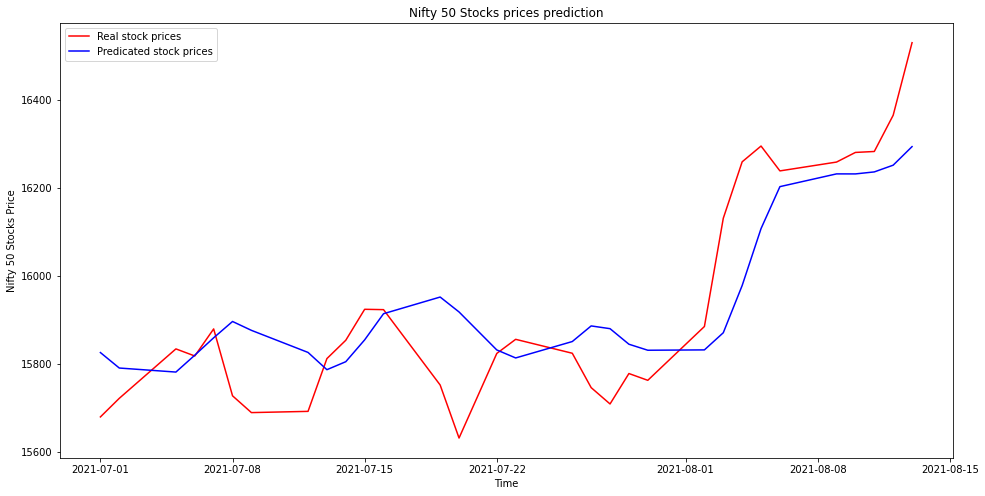

In [139]:
##Visualing the results
plt.figure(figsize=(16,8))
plt.plot(data_dates,real_stock_prices,color="red",label ="Real stock prices")
plt.plot(data_dates,predicted_stock_prices,color="blue",label ="Predicated stock prices")
plt.title("Nifty 50 Stocks prices prediction")
plt.xlabel('Time')
plt.ylabel("Nifty 50 Stocks Price")
plt.legend()
plt.show()

In [140]:
next_data = [inputs[len(inputs)-60:len(inputs+1),0]]
next_data = np.array(next_data)
next_data = np.reshape(next_data,(next_data.shape[0],next_data.shape[1],1))

In [141]:
next_data.shape

(1, 60, 1)

In [142]:
prediction = regressor.predict(next_data)
prediction = sc.inverse_transform(prediction)
print(f"Prediction: {prediction}")

Prediction: [[16379.068]]
